In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [6]:
data=pd.read_csv('titanic.csv')

In [7]:
df=pd.DataFrame(data)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.shape

(891, 12)

The dataset has 891 rows and 12 columns

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We can see the datatype of each column from the above

In [11]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Survived is the target variable

In [12]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Since the target has values 0 & 1 it is a logistic regression problem.

# Encoding the columns

In [14]:

le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])

In [15]:
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Cabin']=le.fit_transform(df['Cabin'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


The daset after encoding

# Checking null values in the daset

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

column Age  has null values

# Removing unnecessary features

In [20]:
df=df.drop(['Name','Ticket','PassengerId'],axis=1)

# Removing Null values

In [21]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [23]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

The null values are removed from the dataset

# Checking for Outliers

Survived       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Pclass      AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Sex         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Age         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
SibSp       AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Parch       AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Fare              AxesSubplot(0.125,0.125;0.110714x0.343182)
Cabin          AxesSubplot(0.257857,0.125;0.110714x0.343182)
Embarked       AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

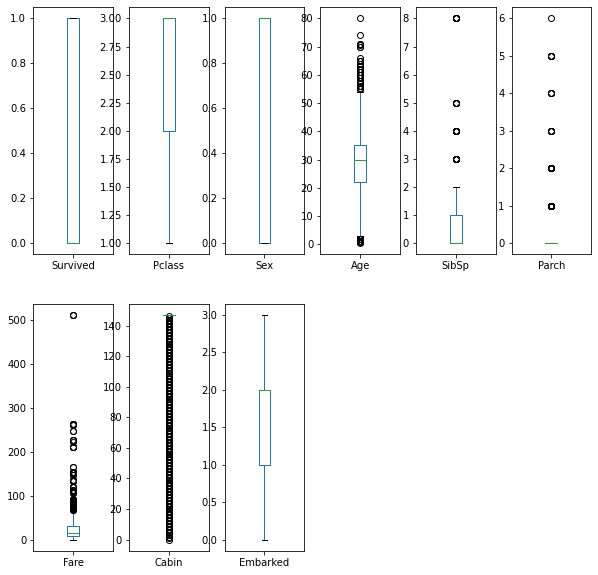

In [25]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

The above box plot shows the prsence of the outliers

# Checking for skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

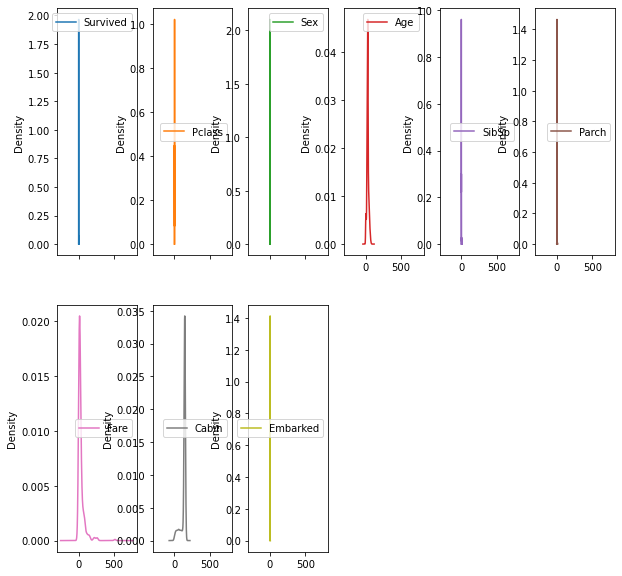

In [26]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(10,10)) 

In [27]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin      -2.167313
Embarked   -1.246689
dtype: float64

The above plot and the skew data shows the presence of skewness in all the columns except Age column

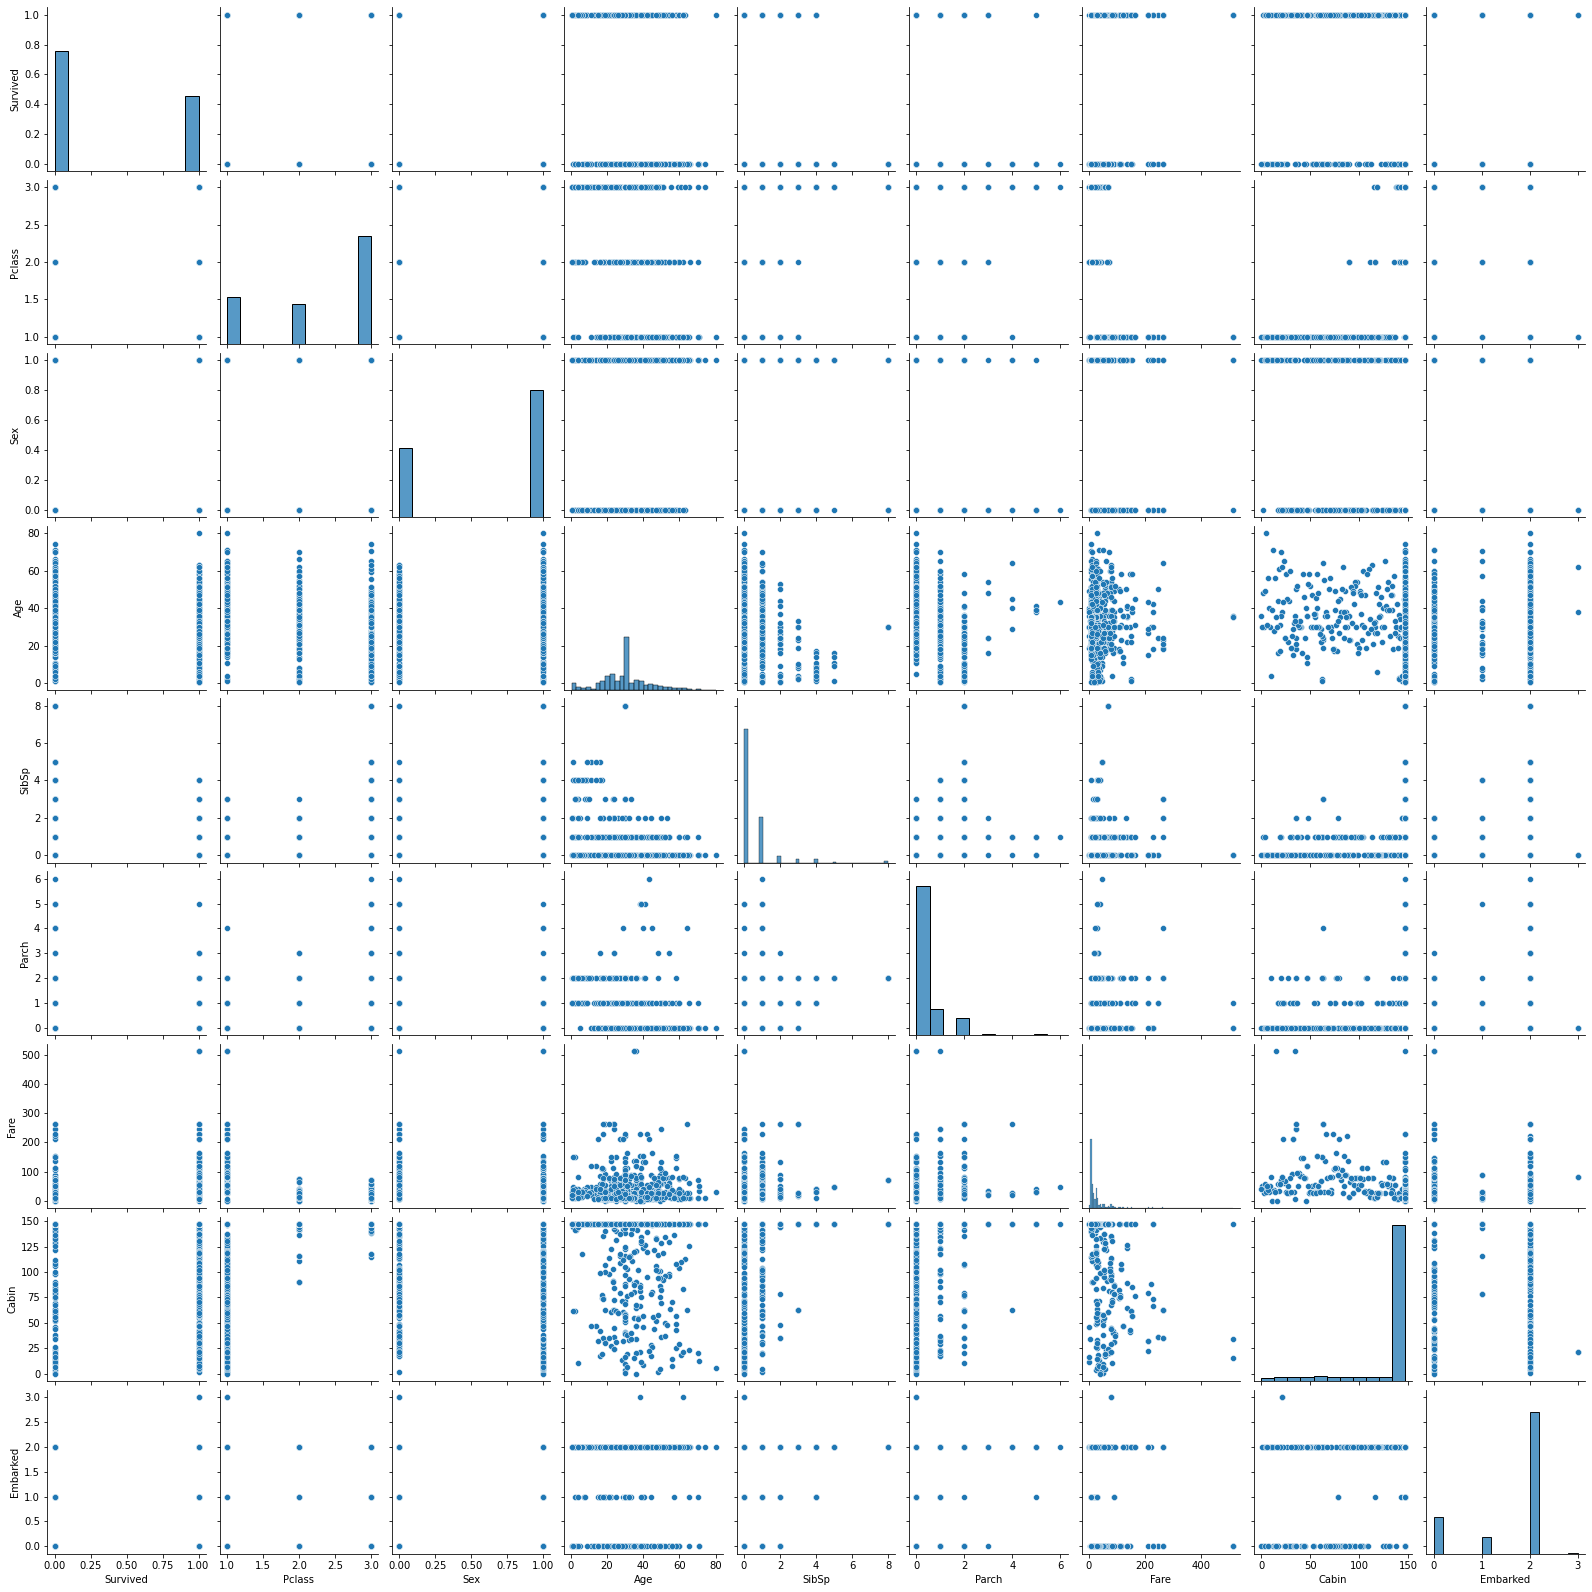

In [33]:
sns.pairplot(df)

The above plot shows the relation between difefrent columns

# Distribution of Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

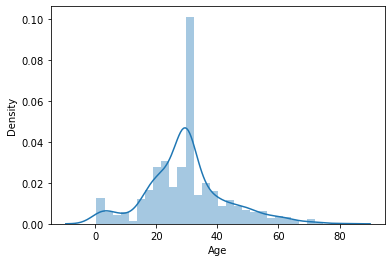

In [28]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

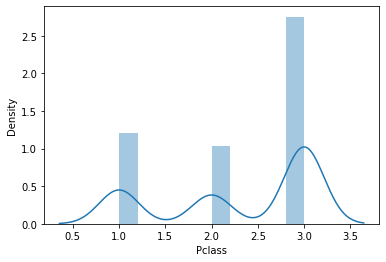

In [138]:
sns.distplot(df['Pclass'])

(array([314.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 577.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

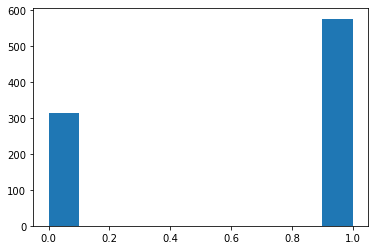

In [97]:
plt.hist(df['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

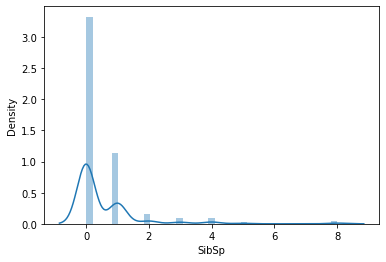

In [98]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

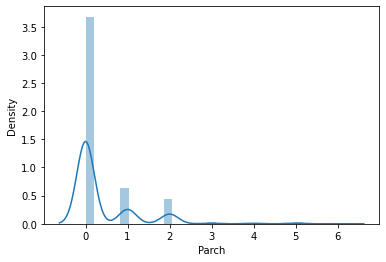

In [100]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

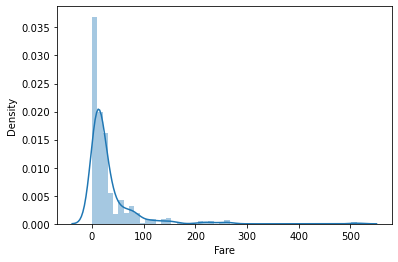

In [102]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

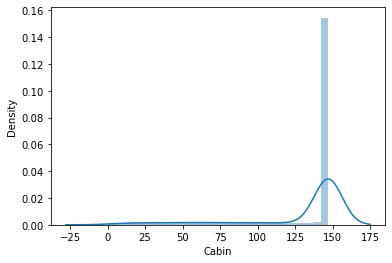

In [103]:
sns.distplot(df['Cabin'])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

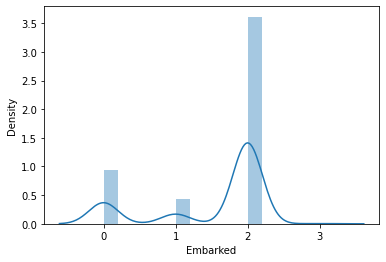

In [104]:
sns.distplot(df['Embarked'])

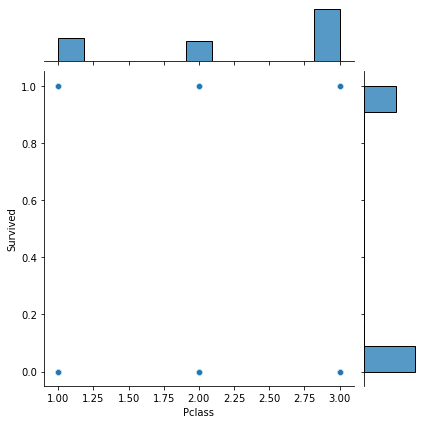

In [113]:
sns.jointplot(data=df,x=df['Pclass'],y=df['Survived'])

From the above plot we can see the dots in the middle how the target variable(Sirvived) varies with input variable(Pclass).
Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). 
The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y).

<AxesSubplot:xlabel='Age', ylabel='Survived'>

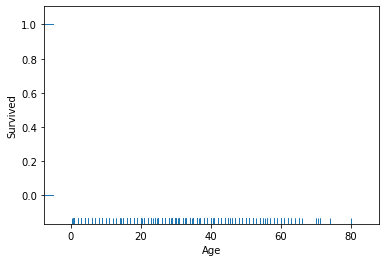

In [108]:
sns.rugplot(data=df,x=df['Age'],y=df['Survived'])

The above plot shows the distribution of independent variable Age and Dependent variable Survived

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

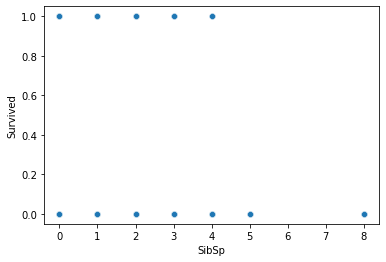

In [109]:
sns.scatterplot(data=df,x=df['SibSp'],y=df['Survived'])

The above plot shows the relation between Survived and Sibsp.Shows how both are related.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

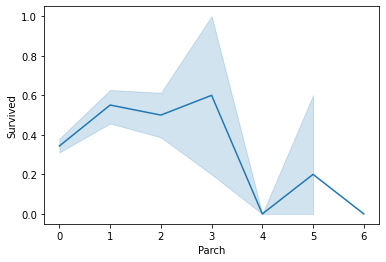

In [110]:
sns.lineplot(data=df,x=df['Parch'],y=df['Survived'])

The above plot gives us information about the frequency of the data.

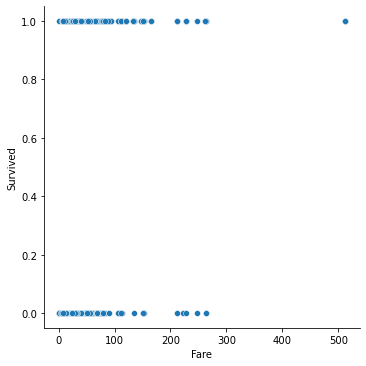

In [111]:
sns.relplot(data=df,x=df['Fare'],y=df['Survived'])

The above plot gives the relation between Survived and Fare

<AxesSubplot:xlabel='Survived', ylabel='count'>

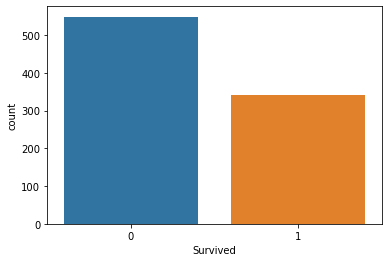

In [114]:
sns.countplot(df['Survived'])

Gives the count of the survivors

# Removing outliers

In [28]:
z=np.abs(zscore(df))

In [29]:
df_new=df[(z<3).all(axis=1)]

In [30]:
df.shape

(891, 9)

In [31]:
df_new.shape

(798, 9)

df_new is the new dataset after removal of outliers.It has 798 rows and 9 columns

# Checking for multicollinearity

In [32]:

df_new.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.320615,-0.556484,-0.099360,0.092976,0.196117,0.320696,-0.250213,-0.148655
Pclass,-0.320615,1.000000,0.147360,-0.320767,-0.066876,-0.081111,-0.695231,0.657617,0.113710
Sex,-0.556484,0.147360,1.000000,0.097928,-0.199632,-0.249635,-0.241944,0.131364,0.118317
Age,-0.099360,-0.320767,0.097928,1.000000,-0.147892,-0.255917,0.150744,-0.214936,0.009884
SibSp,0.092976,-0.066876,-0.199632,-0.147892,1.000000,0.318332,0.255921,-0.046882,-0.013954
Parch,0.196117,-0.081111,-0.249635,-0.255917,0.318332,1.000000,0.256647,-0.073581,-0.017543
Fare,0.320696,-0.695231,-0.241944,0.150744,0.255921,0.256647,1.000000,-0.603021,-0.195335
Cabin,-0.250213,0.657617,0.131364,-0.214936,-0.046882,-0.073581,-0.603021,1.000000,0.183771
Embarked,-0.148655,0.113710,0.118317,0.009884,-0.013954,-0.017543,-0.195335,0.183771,1.000000


<AxesSubplot:>

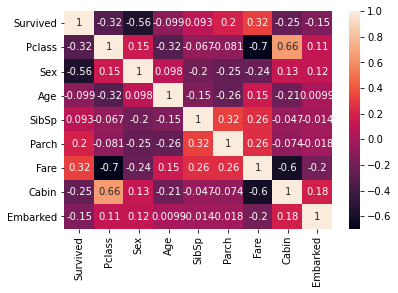

In [33]:
sns.heatmap(df_new.corr(),annot=True)

lighter shades are highly correlated.

<function matplotlib.pyplot.show(close=None, block=None)>

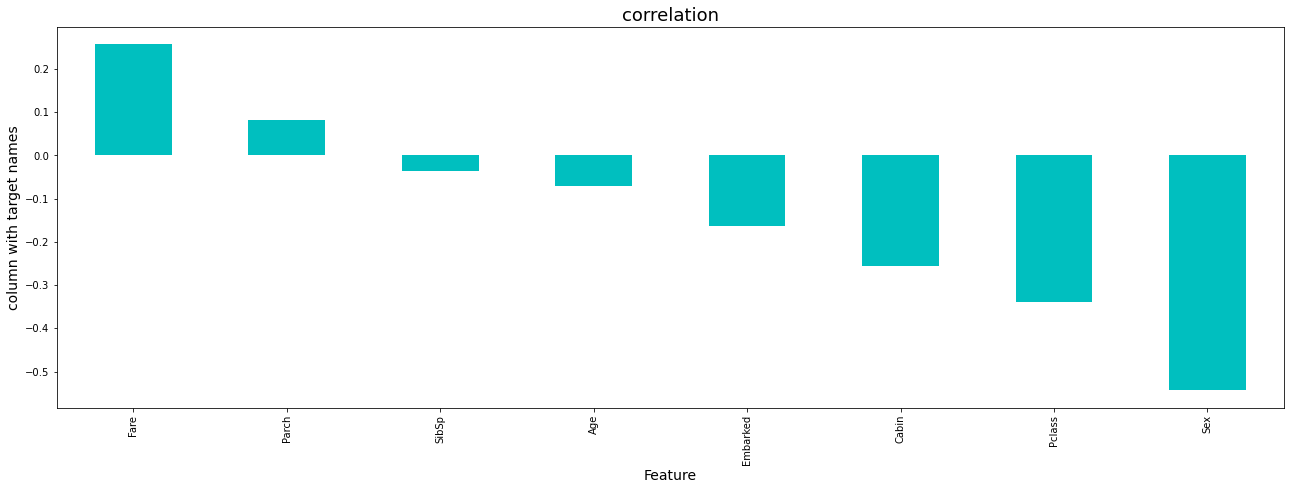

In [40]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


The above graph shows the columns that are positively and negatively correlated to the target variable Survived

In [34]:
x=df_new.drop('Survived',axis=1)
y=df_new['Survived']

In [35]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [36]:
calc_vif(x)

,variables,VIF FACTOR
0,Pclass,20.120655
1,Sex,3.232561
2,Age,6.913022
3,SibSp,1.585666
4,Parch,1.529336
5,Fare,2.482557
6,Cabin,30.164283
7,Embarked,5.065855


Cabin and Pclass has high VIF,hence dropping Cabin

In [37]:

x=df_new.drop(['Cabin'],axis=1)

In [38]:
calc_vif(x)

,variables,VIF FACTOR
0,Survived,2.149730
1,Pclass,6.810550
2,Sex,3.886427
3,Age,6.187881
4,SibSp,1.585923
5,Parch,1.526711
6,Fare,2.779873
7,Embarked,4.752299


we can see that VIF is less than 10 in all the columns

In [39]:
df_new=x

# Removing skewness

In [40]:
df_new.skew()

Survived    0.474816
Pclass     -0.711343
Sex        -0.661023
Age         0.316199
SibSp       1.965945
Parch       2.123012
Fare        2.407447
Embarked   -1.301465
dtype: float64

All the columns has skewness except Age

In [41]:
x=df_new.drop('Survived',axis=1)
y=df_new['Survived']

In [42]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Using yeo johnson method to remove skewness since there is negative values in few columns

In [43]:

x

array([[ 0.85157429,  0.72311878, -0.60966353, ..., -0.48505817,
        -0.82771952,  0.60413977],
       [-1.51475403, -1.38289868,  0.70776146, ..., -0.48505817,
         1.58672901, -1.80094707],
       [ 0.85157429, -1.38289868, -0.27200087, ..., -0.48505817,
        -0.73249518,  0.60413977],
       ...,
       [ 0.85157429, -1.38289868,  0.03482251, ...,  2.08517504,
         0.4347408 ,  0.60413977],
       [-1.51475403,  0.72311878, -0.27200087, ..., -0.48505817,
         0.69585365, -1.80094707],
       [ 0.85157429,  0.72311878,  0.22336108, ..., -0.48505817,
        -0.75641499, -1.27425379]])

The value of x after using power-transform method

# Scaling the feature columns

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# The target variable has imbalance date hence using SMOTE technique to balance the target variable

In [46]:
y.value_counts()

0    491
1    307
Name: Survived, dtype: int64

In [47]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [48]:
trainy.value_counts()

0    491
1    491
Name: Survived, dtype: int64

The target variable is balanced after applying SMOTE technique

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [51]:
train_x,test_x,train_y,test_y=train_test_split(trainx,trainy,test_size=22,random_state=45)

In [52]:
train_x.shape

(960, 7)

In [53]:
test_x.shape

(22, 7)

In [54]:
train_y.shape

(960,)

In [55]:
test_y.shape

(22,)

In [56]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.825  on Random_state  95


# LogisticRegression

In [57]:
lg=LogisticRegression()

In [58]:
lg.fit(train_x,train_y)

LogisticRegression()

In [59]:
pred=lg.predict(test_x)

In [60]:
pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [61]:
accuracy_score(test_y,pred)

0.8181818181818182

In [63]:
confusion_matrix(test_y,pred)

array([[ 5,  1],
       [ 3, 13]], dtype=int64)

In [64]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.83      0.71         6\n           1       0.93      0.81      0.87        16\n\n    accuracy                           0.82        22\n   macro avg       0.78      0.82      0.79        22\nweighted avg       0.85      0.82      0.83        22\n'

The accuracy score is 81.81

# DecisionTreeClassifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtc=DecisionTreeClassifier()

In [67]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [68]:
pred=dtc.predict(test_x)

In [69]:
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [70]:
accuracy_score(test_y,pred)

0.7727272727272727

In [71]:
confusion_matrix(test_y,pred)

array([[ 4,  2],
       [ 3, 13]], dtype=int64)

In [72]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       0.57      0.67      0.62         6\n           1       0.87      0.81      0.84        16\n\n    accuracy                           0.77        22\n   macro avg       0.72      0.74      0.73        22\nweighted avg       0.79      0.77      0.78        22\n'

The accuracy score is 77.27

# KNeighborsClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn=KNeighborsClassifier(n_neighbors=5)

In [75]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [76]:
pred=knn.predict(test_x)

In [77]:
pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [137]:
accuracy_score(test_y,pred)

0.7727272727272727

In [120]:
confusion_matrix(test_y,pred)

array([[ 5,  1],
       [ 3, 13]], dtype=int64)

In [121]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.83      0.71         6\n           1       0.93      0.81      0.87        16\n\n    accuracy                           0.82        22\n   macro avg       0.78      0.82      0.79        22\nweighted avg       0.85      0.82      0.83        22\n'

# SVC

In [97]:
from sklearn.svm import SVC

In [119]:
svc=SVC(kernel='poly')

In [120]:
svc.fit(train_x,train_y)

SVC(kernel='poly')

In [121]:
pred=svc.predict(test_x)

In [122]:
pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [123]:
accuracy_score(test_y,pred)

0.7727272727272727

In [124]:
confusion_matrix(test_y,pred)

array([[ 5,  1],
       [ 4, 12]], dtype=int64)

In [125]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       0.56      0.83      0.67         6\n           1       0.92      0.75      0.83        16\n\n    accuracy                           0.77        22\n   macro avg       0.74      0.79      0.75        22\nweighted avg       0.82      0.77      0.78        22\n'

The accuracy score is 77.27

# cross_val_score

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
print(cross_val_score(lg,train_x,train_y,cv=5).mean())

0.7989583333333334


In [128]:
print(cross_val_score(dtc,train_x,train_y,cv=5).mean())

0.7822916666666667


In [130]:
print(cross_val_score(svc,train_x,train_y,cv=5).mean())

0.796875


In [131]:
print(cross_val_score(knn,train_x,train_y,cv=5).mean())

0.803125


Comparing the Accuracy score and the CV score decision tree classifier is the best model.

In [132]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [139]:
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini', 'entropy'],
          'splitter':['best', 'random'],
          'max_features':['auto','sqrt','log2']}

In [140]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [141]:
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [142]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [143]:
Final_model=DecisionTreeClassifier(criterion='entropy',max_depth=7,max_features='sqrt',splitter='best')
Final_model.fit(train_x,train_y)
pred=Final_model.predict(test_x) 
acc=accuracy_score(test_y,pred)

In [144]:
acc

0.8181818181818182

The accuracy of the model is 81.81% .Decision tree classifier model perform well compared to other models